# Backtracking

In [1]:
# You can safely ignore the next two lines.
import matplotlib.pyplot as plt
%matplotlib inline

Constraint Satisfaction Problems or CSPs (Constraint Satisfaction Problems) are problems in which one looks for objects that satisfy a certain number of constraints or criteria. In general, many CSPs require a combination of heuristics and combinatorial optimization methods to be solved in a reasonable time.

However, for simple enough problems, one can try each possibility (combination) until the right one is found. If a blockage appears, in other words if there is no possibility, we return to the last case examined where another possibility existed and continue from there. This way of doing is called **back-tracking**.

## High-level view

The backtracking algorithm works be recursively enumerating a set of partial candidates for a given satisfaction problem. These partial candidates are all part of a tree: the potential search tree. Each partial candidate is the parent of some other candidates that only differ from it by a single alteration. The leaves of the tree represent full candidates that cannot be further modified. The backtracking algorithm works by traversing the search tree recursively, considering the partial candidates it encounters. At each step, the algorithm checks whether:

  - the partial candidate can be completed toward a solution. In that case, the algorithms continue recursively by enumerating all the children of the initial partial solution.
  - the partial solution is a valid solution to the constraint satisfaction problem. In that case, that solution is reported.
  - the partial solution cannot be completed toward a solution. This means that a valid solution cannot be found among the children of the considered partial solution and hence, should not be considered by the algorithm.

These steps can be expressed using the following pseudo-code:

```python
def bt(c):
    # "c" is a partial solution to our problem
    if reject(c):
        # If "c" cannot be completed further, we prune all
        # the children of "c" -- i.e. we simply return from
        # the call to "bt(c)"
        return
    elif accept(c):
        # If "c" is a valid complete solution, we report it
        yield c
    else:
        # Otherwise, we iterate over all the partial solutions
        # that can be obtained from a single modification to "c"
        #
        # For each of these sub-partial solution, we do a
        # recursive call to "bt"
        for subc in children(c):
            yield from bt(subc)
```

Here, the definitions of `reject`, `accept` and `children` depend on the problem we are trying to solve.

## Subset sum

Subset sum problem is the problem of finding a subset such that the sum of elements equal a given number. We will here use a backtracking approach to solve this problem. The different steps follow:

 1. we start with an empty set
 2. we add the next element from the set of available numbers to the set
 3. if the subset is having desired sum, then we stop with that subset as solution
 4. if the subset is not feasible (it is having a sum greater than the desired one) or if we have reached the end of the set of available numbers, then we backtrack
 5. otherwise, if the subset is feasible (it is having a sum lower than the desired one), then we continue we the next available numbers.

If at some point we have visited all the elements without finding a suitable subset and no backtracking is possible, then we stop: the problem is not satisfiable.

This leads to the following code.

In [2]:
def subset_sum(nm, S, M):
    # "nm" is the set of available numbers
    # "M" is the target sum
    # "S" is the current partial solution

    nS = sum(S) # The sum of the partial solution
    
    if nS > M:
        # "S" is a non-feasible solution.
        # We reject it.
        return None
    
    if nS == M:
        # S is a valid solution.
        # We accept it.
        return S

    for i in nm:
        # Otherwise, we try to extend S with the integers
        # from "nm" - 1 by 1 and continue recursively.
        rS = subset_sum(
            nm.difference([i]), # We remove "i" from "nm"
            S.union([i])      , # We add "i" to "S"
            M                   # The targeted sum is unchanged
        )
        
        if rS is not None:
            # We found a solution (recursively)
            # We return it
            return rS
    
    # We tried all the numbers in "nm" without finding
    # a solution. We report the failure with "None"
    return None

print(subset_sum({ 2, 9, 10, 1, 99, 3}, set(), 4))
print(subset_sum({ 2, 9, 10, 1, 99, 3}, set(), 5))
print(subset_sum({ 2, 9, 10, 1, 99, 3}, set(), 115))
print(subset_sum({ 2, 9, 10, 1, 99, 3}, set(), 116))

{1, 3}
{2, 3}
{1, 2, 99, 3, 10}
None


## Solving Sudoku

The aim of the Sudoku game is to fill a 9x9 grid with digits from `1` to `9`, all different, which are never more than once in the same row, column or 3x3 block. Most of the time, a few symbols are already arranged in the grid, allowing the entire problem to be solved gradually. Here is one example of a Sudoku grid:

<img src="files/sudoku.png" width="300px" />

In Python, we are going to represent Sudoku grids as an array of arrays `board` for size 9x9 where `board[i][j]` contains the value of the cell at row `i` and column `i`, with the convention that a value of `0` indicates that the cell value is still unknown. For instance, the Sudoku grid above is represented with the following Python value:

In [3]:
def create_board():
    return [
        [0,0,0,4,0,0,1,2,0],
        [6,0,0,0,7,5,0,0,9],
        [0,0,0,6,0,1,0,7,8],
        [0,0,7,0,4,0,2,6,0],
        [0,0,1,0,5,0,9,3,0],
        [9,0,4,0,6,0,0,0,5],
        [0,0,0,3,0,0,0,1,2],
        [1,2,0,0,0,7,4,0,0],
        [0,4,9,2,0,6,0,0,7],
    ]

We also create a function for printing Sudoku grids:

In [4]:
def sudoku_print(board):
    # A simple function for printing a Sudoku board
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("- " * 12)

        for j in range(9):
            if j % 3 == 0 and j != 0:
                print(" | ", end = '')

            if j != 0:
                print(' ', end = '')
            print(board[i][j] or '.', end = '')
        print()
        
sudoku_print(create_board())

. . . |  4 . . |  1 2 .
6 . . |  . 7 5 |  . . 9
. . . |  6 . 1 |  . 7 8
- - - - - - - - - - - - 
. . 7 |  . 4 . |  2 6 .
. . 1 |  . 5 . |  9 3 .
9 . 4 |  . 6 . |  . . 5
- - - - - - - - - - - - 
. . . |  3 . . |  . 1 2
1 2 . |  . . 7 |  4 . .
. 4 9 |  2 . 6 |  . . 7


### An solver based on backtracking

We are now interested in solving the Sudoku grid. For that purpose we are going to build a solution incrementally, by filling the cells one by one. Hence, for each cell, either

  - the cell is already filled in, we have nothing to do, or
  - the cell is empty and we have to find some valid number for it.
  
In the last case, we need to enumerate all the possible numbers, and then to test that the updated grid leads us to a solution or to a dead-end. When reaching a dead-end, then we revise our last choice and start again the exploration. Eventually, we will reach a solution or we exhausted all our choices. In the last case, the grid is not solvable.

In [5]:
def sudoku_check_at(board, i0, j0):
    # This function checks wether the cell value at
    # (i0, j0) is compatible with the rest of the board
    
    # Check that the cell at board[i0][j0] is set
    assert(1 <= board[i0][j0] <= 9)

    # Iterate over the i0-th line and j0-th column:
    for k in range(9):
        # Check that the value at (k, j0) is different from
        # the one at (i0, j0), i.e. that the value at (i0, j0)
        # does not appear somewhere else on the i0-th line
        if k != i0 and board[k][j0] == board[i0][j0]:
            return False
        # Check that the value at (j0, k) is different from
        # the one at (i0, j0), i.e. that the value at (i0, j0)
        # does not appear somewhere else on the j0-th column
        if k != j0 and board[i0][k] == board[i0][j0]:
            return False

    # Iterate over the 3x3 block the cell (i0, j0) is a member
    # of the cell (i, j) is part of the (bi, bj)-th block
    bi, bj = i0 // 3, j0 // 3
    for i in range(3*bi, 3*bi+3):
        for j in range(3*bj, 3*bj+3):
            # Check that the value at (i, j) is different from
            # the one at (i0, j0), i.e. that the value at (i0, j0)
            # does not appear somewhere else on the 3x3 block the
            # base cell is a member of.
            if (i, j) == (i0, j0):
                continue
            if board[i][j] == board[i0][j0]:
                return False

    return True 

def sudoku_find_empty(board):
    # This function finds an empty cell in the board.
    # It returns its coordinates or `None` if no such
    # cell exists.
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return (i, j)
    return None

def sudoku_solve(board):
    # Try to solve the board `board`

    # First, we find an unset cell...
    empty = sudoku_find_empty(board)

    # ...if there are no such cells, we are done...
    if empty is None:
        return True

    # ...otherwise, let (i, j) be its coordinates.
    i, j = empty

    # For all possible values `c` in [1, 9]
    for c in range(1, 9+1):
        # Set the cell (i, j) to `c` and...
        board[i][j] = c
        # ...check that this new value does violate some
        # constraint...
        if not sudoku_check_at(board, i, j):
            # We have a constraint violation, we move
            # to the next value.
            continue
        # ...try to solve the board by moving to the next
        # free cell. We do this with a recursive call to
        # `sudoku_solve`...
        if sudoku_solve(board):
            return True
        
        # ...however, the board was not solvable. We hene
        # move to the next value.

    # We did not find a suitable value for the cell (i, j).
    # We have to backtrack. We unset the cell (i, j) and
    # return from the function. The caller will change some
    # other cell value and call us again. (Do not forget
    # that this function is recursive!)
    board[i][j] = 0; return False

Let's now test this solver on our test grid (and let's time it!)

In [6]:
import time

def test_sudoku_solver(board):
    base  = time.time()
    if sudoku_solve(board):
        print(f'Solution found in {time.time()-base:.5f}s\n')
        sudoku_print(board)

test_sudoku_solver(create_board())

Solution found in 0.00238s

5 7 8 |  4 3 9 |  1 2 6
6 1 2 |  8 7 5 |  3 4 9
4 9 3 |  6 2 1 |  5 7 8
- - - - - - - - - - - - 
8 5 7 |  9 4 3 |  2 6 1
2 6 1 |  7 5 8 |  9 3 4
9 3 4 |  1 6 2 |  7 8 5
- - - - - - - - - - - - 
7 8 5 |  3 9 4 |  6 1 2
1 2 6 |  5 8 7 |  4 9 3
3 4 9 |  2 1 6 |  8 5 7


You can see that the program find a solution in a few thousandths of a second. We will come back to the timing later.

So that you better understand how the algorithm works, the animated image below examplified its execution. Green cells denote cells whose value as been fixed by the problem, whereas red cells denote cells for which the algorithm made a choice. You can see that the program progresses incrementally in the grid, trying all the digits between 1 to 9, one by one. When the algorithm reached a dead-end, i.e. when it is not possible to fill a new blank cell with a valid value, the program backtrack: it revises its last choice -- this is when the number of red cells decreases in the animation.

<img src="files/sudoku.gif" width="300px" />



### Enumerating all solutions

With a slight modification of the algorithm, it is easy to iterate over all the solutions. In that case, when a solution is found, we `yield` it and then backtrack so that we start searching for the next one:

In [7]:
def sudoku_solve_all(board):
    # That function is near to identical to `sudoku_solve`
    # However, it iterates over all the solutions
    
    empty = sudoku_find_empty(board)

    if empty is None:
        # We solved the board, so let's yield it...
        yield board
    else:
        i, j = empty

        for c in range(1, 9+1):
            board[i][j] = c

            if not sudoku_check_at(board, i, j):
                continue

            # We managed to set one more cell. From that point
            # we simply iterate over all the possible (sub)solutions
            # and yield them back
            yield from sudoku_solve_all(board)

        board[i][j] = 0

We can now enumerate all the solutions of our test grid (there are 4 solutions that we find in a few hundreds of second):

In [8]:
import time

def test_enumerate_sudoku(board):
    base = time.time()
    for i, board in enumerate(sudoku_solve_all(board)):
        print(f'Solution {i} ({time.time() - base:.5f}):\n')
        sudoku_print(board)
        print(); base = time.time()
        
test_enumerate_sudoku(create_board())

Solution 0 (0.00253):

5 7 8 |  4 3 9 |  1 2 6
6 1 2 |  8 7 5 |  3 4 9
4 9 3 |  6 2 1 |  5 7 8
- - - - - - - - - - - - 
8 5 7 |  9 4 3 |  2 6 1
2 6 1 |  7 5 8 |  9 3 4
9 3 4 |  1 6 2 |  7 8 5
- - - - - - - - - - - - 
7 8 5 |  3 9 4 |  6 1 2
1 2 6 |  5 8 7 |  4 9 3
3 4 9 |  2 1 6 |  8 5 7

Solution 1 (0.00397):

7 5 8 |  4 3 9 |  1 2 6
6 1 2 |  8 7 5 |  3 4 9
4 9 3 |  6 2 1 |  5 7 8
- - - - - - - - - - - - 
5 8 7 |  9 4 3 |  2 6 1
2 6 1 |  7 5 8 |  9 3 4
9 3 4 |  1 6 2 |  7 8 5
- - - - - - - - - - - - 
8 7 5 |  3 9 4 |  6 1 2
1 2 6 |  5 8 7 |  4 9 3
3 4 9 |  2 1 6 |  8 5 7

Solution 2 (0.00393):

7 8 5 |  4 3 9 |  1 2 6
6 1 2 |  8 7 5 |  3 4 9
4 9 3 |  6 2 1 |  5 7 8
- - - - - - - - - - - - 
8 5 7 |  9 4 3 |  2 6 1
2 6 1 |  7 5 8 |  9 3 4
9 3 4 |  1 6 2 |  7 8 5
- - - - - - - - - - - - 
5 7 8 |  3 9 4 |  6 1 2
1 2 6 |  5 8 7 |  4 9 3
3 4 9 |  2 1 6 |  8 5 7

Solution 3 (0.00486):

8 7 5 |  4 3 9 |  1 2 6
6 1 2 |  8 7 5 |  3 4 9
4 9 3 |  6 2 1 |  5 7 8
- - - - - - - - - - - - 
5 8 7 |  9

### Efficiency

We saw that our backtracking algorithm solves our test grid in a few milliseconds. Let's try to understand why. We first instrumentalize our code s.t. it records some extra information (mainly, the number of recursives calls).

In [9]:
def sudoku_solve_with_stats(board, stats = None, depth = 0):
    # This function is identical to `sudoku_solve`.
    # However, it stores some extra information in `stats`
    # s.t. we can them make some statistics.

    stats = {} if stats is None else stats
    empty = sudoku_find_empty(board)

    # Total number of recursive calls
    stats[None] = 1 + stats.get(None, 0)

    # Total number of recursive calls at depth `depth`
    stats[depth] = 1 + stats.get(depth, 0) 
    
    if empty is None:
        return (True, stats)

    i, j = empty

    for c in range(1, 9+1):
        board[i][j] = c
        if not sudoku_check_at(board, i, j):
            continue
        if sudoku_solve_with_stats(board, stats, depth+1)[0]:
            return (True, stats)
        
    board[i][j] = 0; return (False, stats)

Let's first print the number of recursive calls:

In [10]:
print(sudoku_solve_with_stats(create_board())[1][None])

126


You can see that we only made 126 recursive calls! This is very few compared to the size of the search space. Indeed, counting 9 choices per cell with a total number of (initially) 46 empty cells, the search space is of size $\sim 10^{46}$. (And even if we take into account the initial constraints imposed by the green cells, we still have a search space of size $\sim 10^{17}$) This explains why the algorithm performs that well: by checking that a new choice is valid (`sudoku_check_at`) before going recursively, we dramatically cut the search space, allowing to reach a solution in a small amount of time.

We can now try with a less constraint grid:

In [11]:
def create_second_board():
    return [
        [0,0,0,0,2,0,6,0,0],
        [9,0,0,3,0,5,0,0,1],
        [0,0,1,8,0,6,4,0,0],
        [0,0,8,1,0,2,9,0,0],
        [7,0,0,0,0,0,0,0,8],
        [0,0,0,0,0,8,2,0,0],
        [0,0,2,6,0,0,5,0,0],
        [8,0,0,2,0,3,0,0,9],
        [0,0,5,0,1,0,3,0,0],
    ]

import time

def test_second_grid():
    base  = time.time()
    stats = sudoku_solve_with_stats(create_second_board())[1]
    print(f'Solving time: {time.time() - base:.5f}')
    return stats

sg_stats = test_second_grid()
print(sg_stats[None])

Solving time: 1.17383
37103


We can see that the solving time is a big higher but the number of recursive calls is still pretty low compared to the search space. For getting more insight, we can plot the number of recursive calls w.r.t. the call depth:

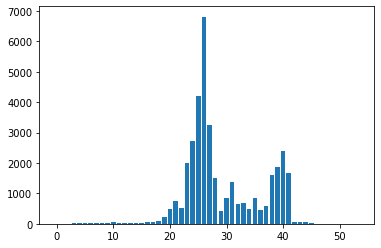

In [12]:
import numpy as np

def plot_stats(stats):
    stats = [x for x in stats.items() if x[0] is not None]
    stats = list(sorted(stats, key = lambda x : x[0]))
    plt.bar(range(len(stats)), [x[1] for x in stats])
    return plt
             
_ = plot_stats(sg_stats)

The histogram is pretty chaotic, and it is indeed hard, for a given problem, to forsee how the backtrakcing algorithm is going to behave. However, we can see that, e.g., when the grid is constraint (at the end of the search) and loosy constraints (at the very beginning), we do not backtrack that much.

### When things go wrong

Finally, some grids may be built to work against backtracking. For example, a puzzle with few hints, no hints in the left column (note that our algorithm works left-right) may require the algorithm the enumerate a large part of the search space. For example, it takes more than one minute to solve the following grid:

Solving time: 103.02090


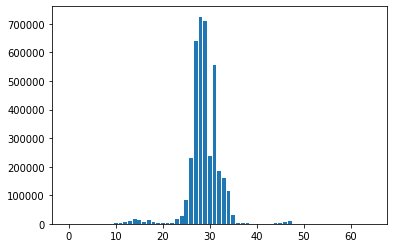

In [13]:
def create_difficult_board():
    return [
        [0, 0, 0, 0, 0, 0, 5, 0, 0],
        [0, 0, 0, 0, 0, 9, 0, 0, 0],
        [0, 0, 1, 0, 4, 0, 0, 2, 0],
        [0, 0, 0, 5, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 1, 4],
        [0, 3, 0, 7, 0, 0, 0, 0, 0],
        [0, 8, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 7, 0, 0],
        [0, 5, 0, 0, 0, 0, 3, 0, 9],
    ]

def test_difficult_grid():
    base  = time.time()
    stats = sudoku_solve_with_stats(create_difficult_board())[1]
    print(f'Solving time: {time.time() - base:.5f}')
    return stats

df_stats = test_difficult_grid()
_ = plot_stats(df_stats)

For Sudoku solving, we could optimized our algorithm s.t. it backtracks less (by choosing the most constraint cells and by propagating constraints). But note that, although backtracking techniques might work in average, they tend to diverge on worst casse scenario.

Also, as a side note, there exist numerous algorithms for solving Sudoku grids. This includes deductive based methods, stochastic search and/or optimization methods.

## Cryptarithmetic

As a second example, we are going to write a program to solve cryptarithmetic puzzles. A cryptarithmetic problem is a type of puzzle consisting of an equation with unknown numbers whose digits are represented by letters. The equation is typically based on an arithmetic operation, such as addition, multiplication or division. The same letter, the same digit, and a different letter, a different digit. Here is one example of cryptarithmetic puzzle:

```
     P E R E
+    N O E L
-------------
=  J O U E T
```
  
We are going to solve a reduced version of this problem where the cryptarithmetic puzzle is only composed a two numbers that are added (as above). However, we will have to carefully craft the way we navigative in the search space to avoid some complexity issues. For instance, we are going to assign letters from right to left (in the problem operands). This allows us to prune partial assignments by doing a truncated sum (for example, a partial assignment that assigns `1` to `E`, `2` to `L` and `5` to `T` can be rejected as the above sum requires `E + L == T`).

In [14]:
def cp_evaluate(nm, table):
    nm = [table.get(x, None) for x in nm]
    if None in nm:
        return None
    return sum([10**(len(nm)-i) * x for i, x in enumerate(nm)])

def cp_solved(op1, op2, res, table, mod = None):
    # If `mod` is not None, then we check that we have a
    # solution modulo `10**mod`. This will allow us to
    # prune partial invalid assignments.
    
    if mod is not None:
        op1 = op1[-mod:]
        op2 = op2[-mod:]
        res = res[-mod:]
    
    op1 = cp_evaluate(op1, table)
    op2 = cp_evaluate(op2, table)
    res = cp_evaluate(res, table)

    if op1 is None or op2 is None or res is None:
        return False
    
    if mod:
        return (op1 + op2) % (10**mod) == (res % (10**mod))
    return op1 + op2 == res
    
def cp_solve(op1, op2, res):
    # Solve the cryptarithmetic puzzle: `op1 + op2 == res`,
    # where all the parameters are strings. The function
    # returns a solution to the puzzle (as a dictionnary from
    # letters to digits or `None`) if the puzzle is not solvable.
    
    # We first gathers all the letters
    letters = set(list(op1) + list(op2) + list(res))

    # Not that if we have more than 10 letters, the problem
    # is not solvable
    if len(letters) > 10:
        return None
    
    # Initially, all letters are unassigned
    letters = { c: None for c in letters}
    
    # We also store the digits that are used in a letter assignment
    used = set()
    
    # Here is the backtracking function. We are going to assign
    # the letters from right to left (in op1, op2 & res)
    #
    # The argument `depth` tells us the position (again, in op1,
    # op2 & res) of the letters we are considering
    def doit(depth):
        if depth >= max(len(op1), len(op2), len(res)):
            # We assigned all the letters. We simply check if
            # the assignment is valid
            return cp_solved(op1, op2, res, letters)
        
        # Otherwise, we try all the possible assignments for the
        # `depth`-th letters of op1, op2 & res. Some of them might
        # have already been assigned.

        # We first gather these unassigned `depth`-th letters
        # (Do remember that we count from the right)
        toassign = set()
        for s in (op1, op2, res):
            if depth < len(s) and letters[s[-depth-1]] is None:
                toassign.add(s[-depth-1])
        toassign = list(toassign)        
        
        # Then, we try to assign them. We again do a recursive and
        # backtracking function.
        def sub_doit(j):
            if j == len(toassign):
                # We assigned all the `depth`-th letters
                # Let's check that this is a partial solution...
                # ... i.e. that (op1 + op2 == res) modulo `10**(depth+1)`.
                #
                # Indeed, we only assigned the first `depth` letters, but
                # this already allows us reject some assignments.
                if not cp_solved(op1, op2, res, letters, depth+1):
                    # The partial assignment is invalid. We backtrack
                    return False

                # Otherwise, we move to the left
                return doit(depth+1)
                    
            # Otherwise, we try all the possible assignments
            # for `toassign[j]`.
            for dg in range(0, 9+1):
                # If `dg` is already used, we skip it
                if dg in used:
                    continue
                    
                # We assign `dg` to `toassign[j]`...
                letters[toassign[j]] = dg; used.add(dg)
                
                # ...and we move to the next letter in `toassign`
                if sub_doit(j+1):
                    return True
        
                # We found no solutions for that assignment.
                letters[toassign[j]] = None; used.remove(dg)
                
            # We found no solutions, we backtrack
            return False
        
        return sub_doit(0)
    
    # This is the main call to the backtracking function
    return letters if doit(0) else None

import time

def test_cp_solve(op1, op2, res):
    base    = time.time()
    letters = cp_solve(op1, op2, res)
    print(f'Checked in {time.time()-base:.5f}s')
    print('{:5s} = {}'.format(
        op1, ''.join([str(letters[x]) for x in op1])))
    print('{:5s} = {}'.format(
        op2, ''.join([str(letters[x]) for x in op2])))
    print('{:5s} = {}'.format(
        res, ''.join([str(letters[x]) for x in res])))
    return letters

print(test_cp_solve('PERE', 'NOEL', 'JOUET'))

Checked in 0.09539s
PERE  = 8303
NOEL  = 6432
JOUET = 14735
{'P': 8, 'J': 1, 'L': 2, 'R': 0, 'E': 3, 'T': 5, 'U': 7, 'O': 4, 'N': 6}
